In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
                                  LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import (
                                        GridSearchCV,
                                        RandomizedSearchCV,
                                        cross_val_score
)
from skopt import BayesSearchCV

# Load Dataset

In [2]:
df = pd.read_csv("used_cars_preocessing.csv")


In [3]:
display(df.head(1))
display(df.info())

,selling_price,engine_CC,max_power_BHP,torque_Nm,age,bhp_engineCC_ratio,bhp_torque_rpm,price_to_km,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,0.042126,0.209396,0.185,0.239848,0.162162,0.059295,0.16095,0.001265,1,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price           8033 non-null   float64
 1   engine_CC               8033 non-null   float64
 2   max_power_BHP           8033 non-null   float64
 3   torque_Nm               8033 non-null   float64
 4   age                     8033 non-null   float64
 5   bhp_engineCC_ratio      8033 non-null   float64
 6   bhp_torque_rpm          8033 non-null   float64
 7   price_to_km             8033 non-null   float64
 8   fuel_Diesel             8033 non-null   int64  
 9   fuel_Petrol             8033 non-null   int64  
 10  seller_type_Dealer      8033 non-null   int64  
 11  seller_type_Individual  8033 non-null   int64  
 12  transmission_Automatic  8033 non-null   int64  
 13  transmission_Manual     8033 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 87

None

# Single Variable LinearRegression

In [4]:
X = df[['price_to_km']]
y = df['selling_price']

In [5]:
slr_model = LinearRegression()
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

slr_model.fit(X_train,y_train)

y_pred = slr_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
score = slr_model.score(X,y)
mse = mean_squared_error(y_pred,y_test)

print(f"SLR MSE :{mse}")
print(f"SLR R_squared :{r2}")
print(f"SLR MSE :{score}")


SLR MSE :0.004158179875145348
SLR R_squared :0.4502416981463868
SLR MSE :0.38995782745705054


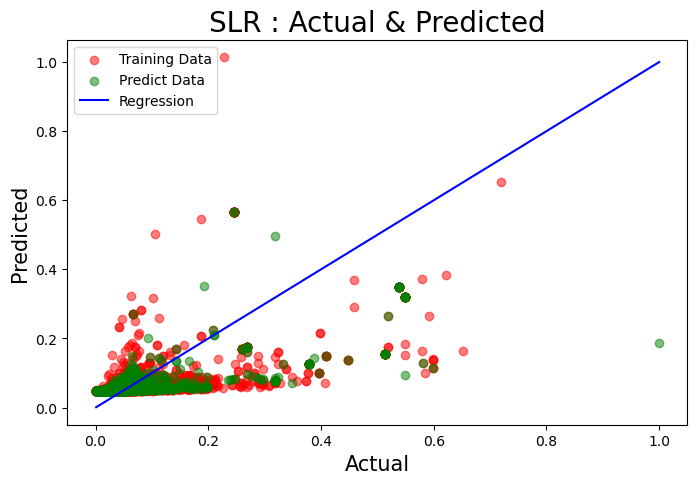

In [6]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,slr_model.predict(X_train),color = 'red', alpha=0.5,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.5,label='Predict Data')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("SLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()

# Multi_vaiable LinearRegression

In [7]:
X = df.drop(['selling_price'],axis=1)
y=df['selling_price']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

mlr_model = LinearRegression()
mlr_model.fit(X_train,y_train)

y_pred = mlr_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
score = mlr_model.score(X,y)
mse = mean_squared_error(y_pred,y_test)


print(f"MLR MSE:{mse}")
print(f"MLR R-squared :{r2}")
print(f"MLR Score:{score}")

MLR MSE:0.00167478932390847
MLR R-squared :0.778573952469457
MLR Score:0.7572995777680125


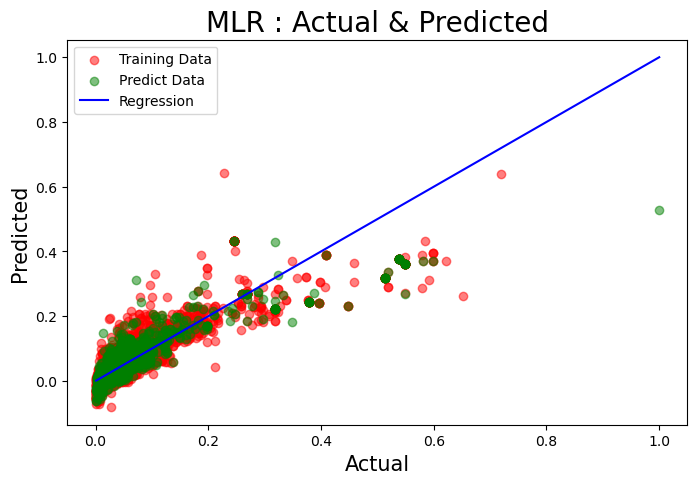

In [8]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,mlr_model.predict(X_train),color = 'red', alpha=0.5,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.5,label='Predict Data')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("MLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()

# Polynomial Regression

In [9]:

X=df[['engine_CC','max_power_BHP','torque_Nm','age','bhp_engineCC_ratio',
   'bhp_torque_rpm','price_to_km','fuel_Diesel','fuel_Petrol']]
y=df['selling_price']


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

poly_model = LinearRegression()
pf = PolynomialFeatures(degree=3)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

poly_model.fit(X_train_poly,y_train)

y_pred = poly_model.predict(X_test_poly)

r2 = r2_score(y_test,y_pred)
score = poly_model.score(X_test_poly,y_test)
mse = mean_squared_error(y_pred,y_test)

print(f"Polynaminal : {mse}")
print(f"Polynaminal R-squared : {r2}")
print(f"Polynaminal Score:{score}")

Polynaminal : 0.00884201654564003
Polynaminal R-squared : -0.16901436374796064
Polynaminal Score:-0.16901436374796064


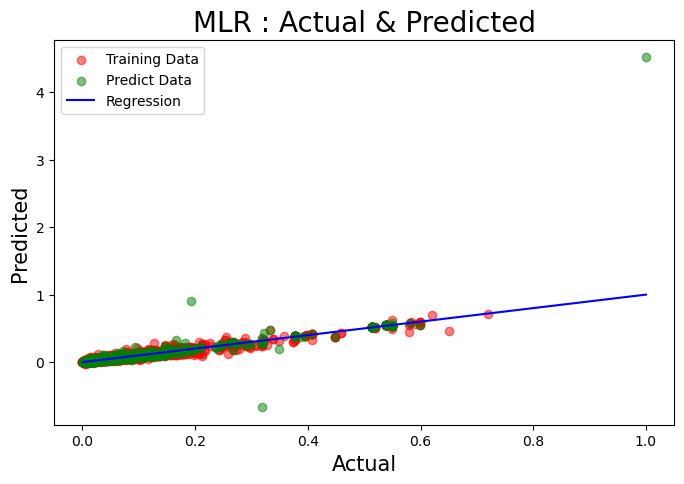

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,poly_model.predict(X_train_poly),color = 'red', alpha=0.5,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.5,label='Predict Data')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("MLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()

# Ridge Regression

In [11]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Lasso MSE:{mse}")
print(f"Lasso R-Squared:{r2}")

Lasso MSE:0.007564464704337177
Lasso R-Squared:-0.00010759398488890959


# Ridge Regression Hyperparameter Optimization using BayesOptimization

In [44]:
ridge_model = Lasso()
params = {'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

opt = BayesSearchCV(
                  estimator = lasso_model,
                  search_spaces = params,
                  n_iter = 20,
                  cv=5,
                  verbose = 1,
                  scoring = "r2"
)

opt.fit(X_train,y_train)

print(f"Bayesian Optimization : \n===================" )
print(f"Best parameters:",opt.best_params_)
print(f"Best R2 Score:",opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Ridge Regression Tuned

In [46]:
ridge_model_tuned = Ridge(alpha=0.4)

ridge_model_tuned.fit(X_train,y_train)

y_pred = ridge_model_tuned.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)


print(f"Ridge MSE:{mse}")
print(f"Ridge R-squared:{r2}")

Ridge MSE:0.0017242201837634817
Ridge R-squared:0.7720386350014734


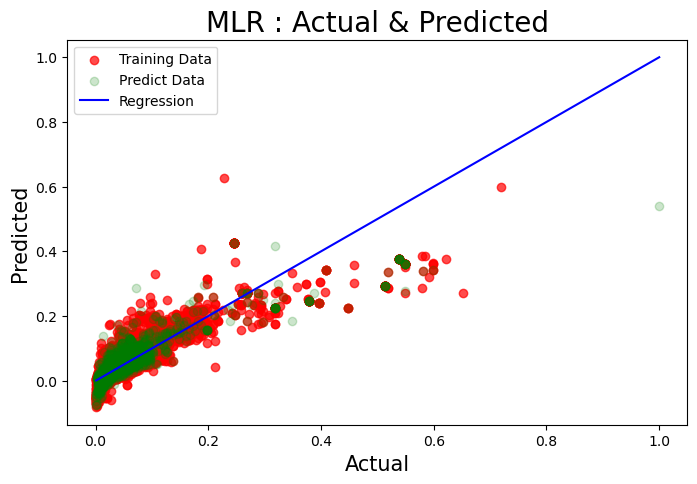

In [47]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,ridge_model_tuned.predict(X_train),color = 'red', alpha=0.7,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.2,label='Predict Data')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("MLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()

# Lasso Regression

In [48]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lasso_model = Lasso()

lasso_model.fit(X_train,y_train)

y_pred = lasso_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Lasso MSE:{mse}")
print(f"Lasso R-squared:{r2}")

Lasso MSE:0.007564464704337177
Lasso R-squared:-0.00010759398488890959


# Lasso Regression Hyperparameter Optimization Using BayesOptimization

In [53]:
lasso_model = Lasso()
params = {'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

opt = BayesSearchCV(
                     estimator=lasso_model,
                     search_spaces = params,
                     n_iter = 20,
                     cv=5,
                     verbose =1,
                     scoring="r2"
)
opt.fit(X_train,y_train)

print(f"Bayesin Optimization : \n=================")
print(f"Best parameters:",opt.best_params_)
print(f"Best R2 Score:",opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Lasso Regression tuned

In [49]:
lasso_model_tuned = Lasso(alpha = 0.0001)

lasso_model_tuned.fit(X_train,y_train)

y_pred = lasso_model_tuned.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"Lasso MSE : {mse}")
print(f"Lasso R-squared:{r2}")

Lasso MSE : 0.0017829364652970404
Lasso R-squared:0.7642756800076326


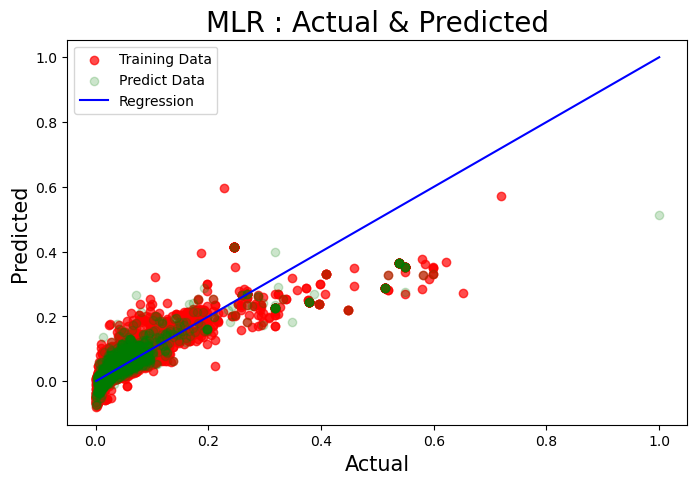

In [54]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,lasso_model_tuned.predict(X_train),color = 'red', alpha=0.7,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.2,label='Predict Data')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("MLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()

# ElasticeNet Regression

In [18]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

elastic_model = ElasticNet()

elastic_model.fit(X_train , y_train)

y_pred = elastic_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"ElasticNet MSE:{mse}")
print(f"ElasticNet R-squared:{r2}")

ElasticNet MSE:0.007564464704337177
ElasticNet R-squared:-0.00010759398488890959


# Elastice Regression Hyperparameter Optimization Using CrossValidation

In [38]:
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
r1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

params_dict = [{'alpha':alpha, 'l1_ratio':l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]
models = [ElasticNet(alpha = params['alpha'], l1_ratio = params['l1_ratio']) for params in params_dict]

cv_scores = [cross_val_score(model,X_train,y_train,cv=10,scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]

print("cross_val_score :\n")
print("The Best Parameters:",best_model_params)
print("The Best R2 Score:",cv_scores[best_model_index])

cross_val_score :

The Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}
The Best R2 Score: 0.7342139045811991


In [40]:
elastice_model_tuned = ElasticNet(alpha=0.0001,l1_ratio=0.1)

elastice_model_tuned.fit(X_train,y_train)

y_pred = elastice_model_tuned.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"ElasticNet MSE:{mse}")
print(f"ElasticNet R-squared:{r2}")

ElasticNet MSE:0.0017457600778410423
ElasticNet R-squared:0.7691908179407041


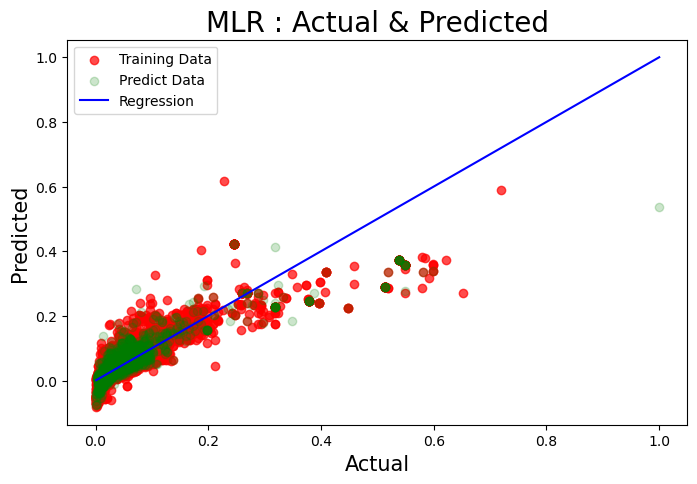

In [41]:
plt.figure(figsize=(8,5))

plt.scatter(y_train,elastice_model_tuned.predict(X_train),color = 'red', alpha=0.7,label='Training Data')

plt.scatter(y_test,y_pred,color='green',alpha=0.2,label='Predict Data')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color='blue',label="Regression")

plt.title("MLR : Actual & Predicted",fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.legend()
plt.show()